-----------------------------------------
organic
-----------------------------------------
Galaxy "organic" redshift: 3.0	 total:  x:7.05	 y:530673.8973847025	 z:2.0
Galaxy "organic" redshift: 7.0	 total:  x:5.971	 y:2723428.97509526	 z:6.0
Galaxy "organic" redshift: 11.0	 total:  x:5.487	 y:5572985.3644033	 z:10.0
Galaxy "organic" redshift: 15.0	 total:  x:5.037	 y:6356936.090343809	 z:14.0
Galaxy "organic" redshift: 19.0	 total:  x:4.485	 y:8716472.843478706	 z:18.0
Galaxy "organic" redshift: 23.0	 total:  x:3.984	 y:15719378.737265056	 z:22.0
Galaxy "organic" redshift: 27.0	 total:  x:3.528	 y:18638687.756359354	 z:26.0
Galaxy "organic" redshift: 31.0	 total:  x:3.017	 y:73533195.28526567	 z:30.0
Galaxy "organic" redshift: 35.0	 total:  x:2.478	 y:72377705.0124683	 z:34.0
Galaxy "organic" redshift: 39.0	 total:  x:2.237	 y:188955138.4467846	 z:38.0
Galaxy "organic" redshift: 43.0	 total:  x:2.012	 y:1130289255.2424817	 z:42.0
Galaxy "organic" redshift: 47.0	 total:  x:1.737	 y:2449

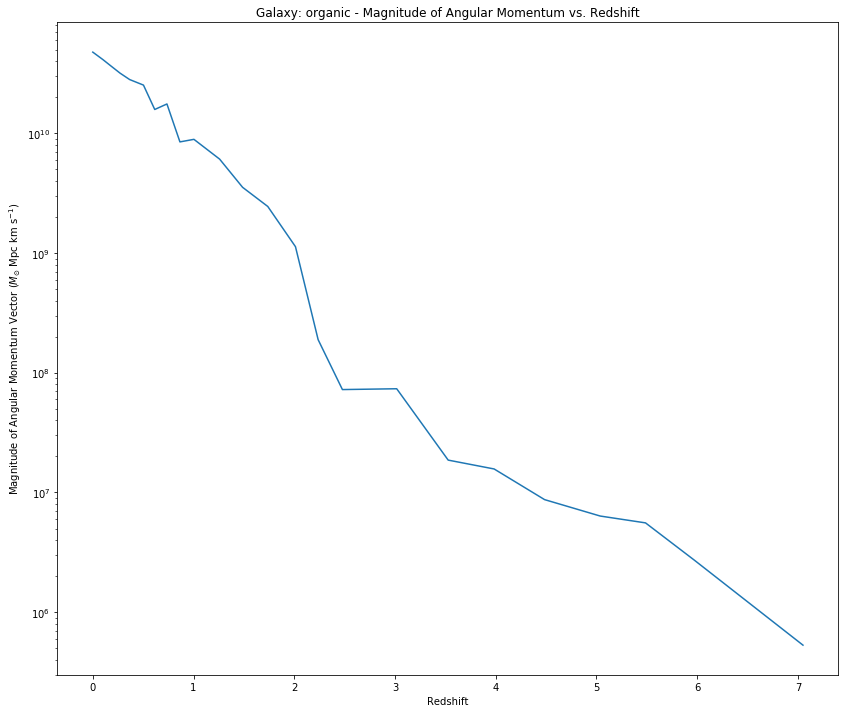

-----------------------------------------
gm_late
-----------------------------------------
Galaxy "gm_late" redshift: 3.0	 total:  x:7.05	 y:666700.5068523489	 z:2.0
Galaxy "gm_late" redshift: 7.0	 total:  x:5.971	 y:2218656.1574387844	 z:6.0
Galaxy "gm_late" redshift: 11.0	 total:  x:5.487	 y:3320175.7870216	 z:10.0
Galaxy "gm_late" redshift: 15.0	 total:  x:5.037	 y:3682717.9457970285	 z:14.0
Galaxy "gm_late" redshift: 19.0	 total:  x:4.485	 y:1619454.9279874256	 z:18.0
Galaxy "gm_late" redshift: 23.0	 total:  x:3.984	 y:12497191.14949138	 z:22.0
Galaxy "gm_late" redshift: 27.0	 total:  x:3.528	 y:25958772.13464839	 z:26.0
Galaxy "gm_late" redshift: 31.0	 total:  x:3.017	 y:54703447.13996506	 z:30.0
Galaxy "gm_late" redshift: 35.0	 total:  x:2.478	 y:87006912.66129822	 z:34.0
Galaxy "gm_late" redshift: 39.0	 total:  x:2.237	 y:40240193.747362204	 z:38.0
Galaxy "gm_late" redshift: 43.0	 total:  x:2.012	 y:143923132.49481332	 z:42.0
Galaxy "gm_late" redshift: 47.0	 total:  x:1.737	 y:

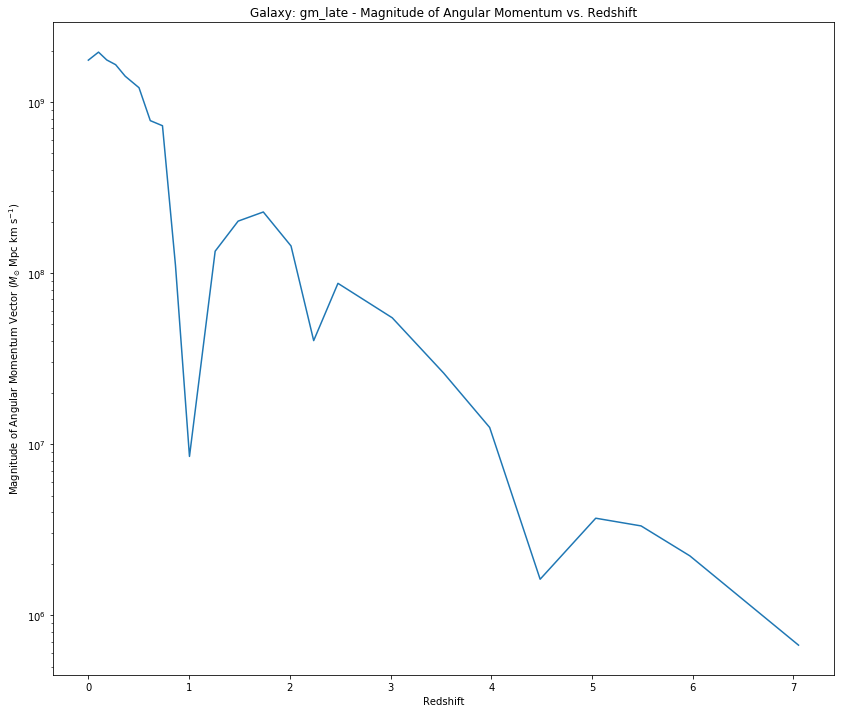

-----------------------------------------
gm_early
-----------------------------------------
Galaxy "gm_early" redshift: 3.0	 total:  x:7.05	 y:331420.4761374974	 z:2.0
Galaxy "gm_early" redshift: 7.0	 total:  x:5.971	 y:1810468.015415329	 z:6.0
Galaxy "gm_early" redshift: 11.0	 total:  x:5.487	 y:2563349.233684781	 z:10.0
Galaxy "gm_early" redshift: 15.0	 total:  x:5.037	 y:36767439.79694715	 z:14.0
Galaxy "gm_early" redshift: 19.0	 total:  x:4.485	 y:60742014.30653751	 z:18.0
Galaxy "gm_early" redshift: 23.0	 total:  x:3.984	 y:50894336.93093377	 z:22.0
Galaxy "gm_early" redshift: 27.0	 total:  x:3.528	 y:124625322.55755728	 z:26.0
Galaxy "gm_early" redshift: 31.0	 total:  x:3.017	 y:672256459.9489483	 z:30.0
Galaxy "gm_early" redshift: 35.0	 total:  x:2.478	 y:3730728104.1496115	 z:34.0
Galaxy "gm_early" redshift: 39.0	 total:  x:2.237	 y:5698796774.517888	 z:38.0
Galaxy "gm_early" redshift: 43.0	 total:  x:2.012	 y:7164847121.069219	 z:42.0
Galaxy "gm_early" redshift: 47.0	 total: 

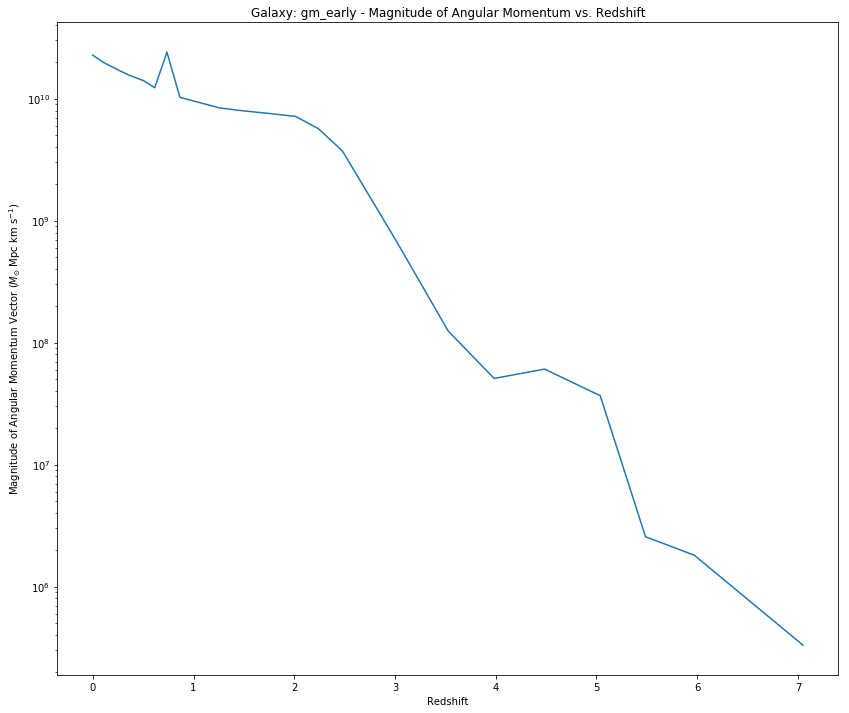

In [6]:
import h5py
import os
import matplotlib.pyplot as plt
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import numpy as np
import re

axisScale = 0.03
datasets = ['organic', 'gm_late', 'gm_early']

for dataset in datasets:
    print('-----------------------------------------')
    print(dataset)
    print('-----------------------------------------')
    
    files = listdir('C:\\Users\\katha\\GalaxyMorphology\\' + dataset)
    os.path.join("/C:", "Users","katha","GalaxyMorphology", dataset)

    count = 0

    galaxyAm = np.array(range(96), dtype=float).reshape(24,4)
    
    for file in files:
    #if 1==1:



        #file = 'star_particles_015_z002p012.hdf5'
        #file = 'star_particles_028_z000p000.hdf5'
        
        # get redshift from the filename
        m = re.search('(z[0-9])\w+', file)
        s = m.group(0).replace('z', '')
        s = s.replace('p', '.')
        
        redshift = float(s)
        #print('redshift = ' + s + ' converted: ' + str(redshift))
        
        # load data for a particular galaxy at a particular redshift
        f = h5py.File('C:\\Users\\katha\\GalaxyMorphology\\' + dataset + '/' + file,'r')

        ds_c = f['Coordinates']
        ds_v = f['Velocity']
        ds_m = f['Mass']
        
        #print ('length: ' + str(np.shape(ds_c)[0]))
        #for pv in ds_c:
        #    print ('x:' + str(pv[0]) + '\t y:' + str(pv[1]) + '\t z:' + str(pv[2]))
        

        # Calculate angular momentum vector for each particle and sum into rTot
        rTot = [0, 0, 0]
        # Swap this for test mode to stop it taking forever
        #for n in range(0, 10):
        #for n in range(0, np.shape(ds_c)[0]):
        #    pv = ds_c[n]
        #    linMv = ds_m[n] * ds_v[n]
        #    
        #    r = np.cross(pv, linMv)
        #    #print ('x:' + str(r[0]) + '\t y:' + str(r[1]) + '\t z:' + str(r[2]))
        #    rTot = rTot + r
            
        r = np.cross(ds_c, ds_v)
        r1 = np.transpose(np.multiply(ds_m, np.transpose(r)))
        #r = np.multiply(ds_m, r)
        angMomTot = np.linalg.norm(r1, axis=1)
        #print (angMomTot)
        #rTot = rTot + r

        # Store totals of all particles for each redshift in the current galaxy
        galaxyAm[count, 0] = redshift
        galaxyAm[count, 1] = np.sum(angMomTot)
              
        count = count + 1
    
    # print each angular momentum component's total per redshift
    for n in range(24):
        print('Galaxy "' + dataset + '" redshift: ' + str(galaxyAm[n][3]) + '\t total:  x:' + str(galaxyAm[n][0]) + '\t y:' + str(galaxyAm[n][1]) + '\t z:' + str(galaxyAm[n][2]))
    
    #print ('length: ' + str(np.shape(galaxyAm)[0]))
    #plt.plot(galaxyAm[0:,3], galaxyAm[0:,2])
    plt.plot(galaxyAm[0:,0], galaxyAm[0:,1])

    plt.title('Galaxy: ' + dataset + ' - Magnitude of Angular Momentum vs. Redshift')
    plt.xlabel('Redshift')
    plt.ylabel(r'Magnitude of Angular Momentum Vector ($M_{\odot}$ Mpc km s$^{-1}$)')
    plt.ticklabel_format(axis='y', style='sci', useMathText=True)
    plt.rcParams["figure.figsize"] = (14,12)
    plt.semilogy()
    plt.show()